# GRIP : The Spark Foundation (Data Science and Business Analytics Intern)
# Batch : July 2021
## Author : V Sureshkumar
## **Task_3(Exploratory Data Analysis - Retail)**

**Task submission:**
 - As a business manager, try to find out the weak areas where you can work to make more profit.
 - What all business problems you can derive by exploring the data?
 - Create the dashboards and/or storyboard and record it

*__Import Libraries__*

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**_Drop Unwanted Information_**

In [4]:
#Drop country and postal code since all the data is from United States
data.drop(['Country','Postal Code'],inplace=True, axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [6]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [7]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

**_Data Visualizations_**

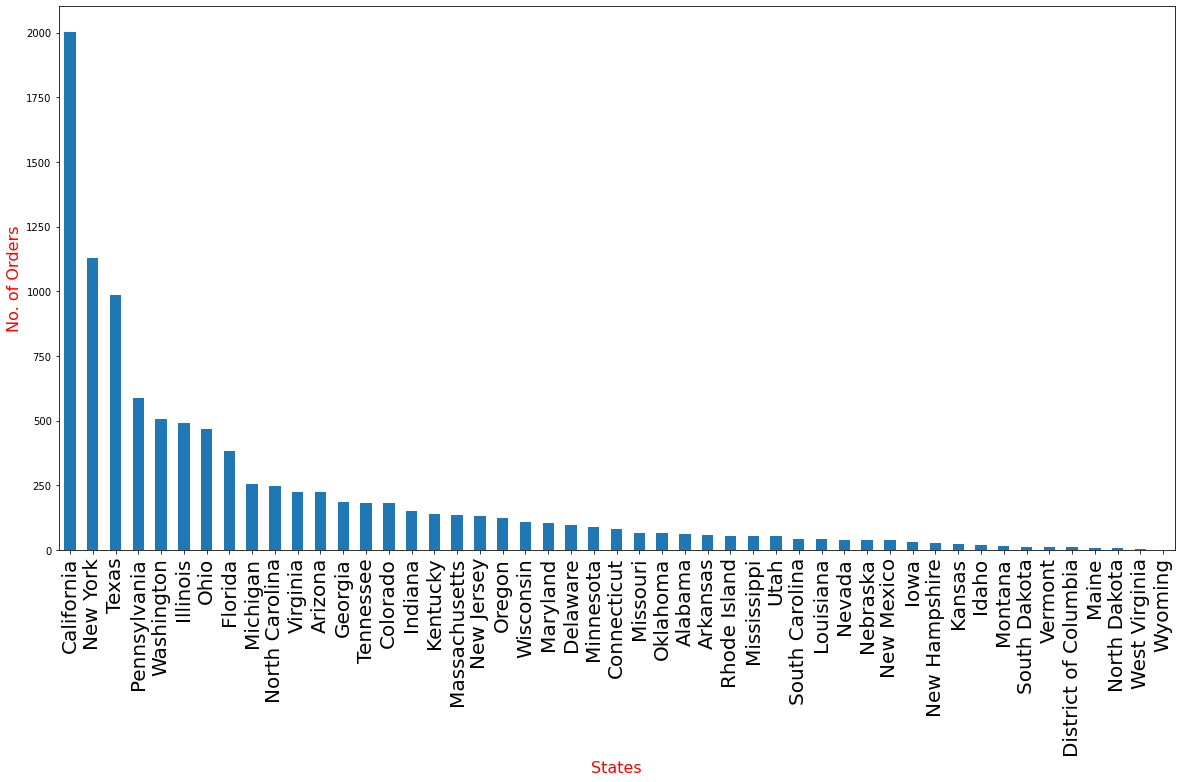

In [8]:
plt.figure(figsize=(20,10))
data['State'].value_counts().plot.bar()
plt.xlabel('States', size=16 , color = 'Red')
plt.xticks(size = 20)
plt.ylabel('No. of Orders', size = 16 ,color = 'Red')
plt.show()

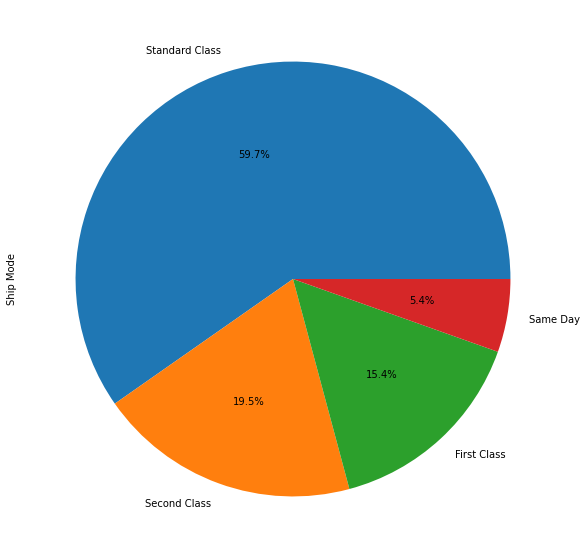

In [9]:
plt.figure(figsize=(20,10))
data['Ship Mode'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

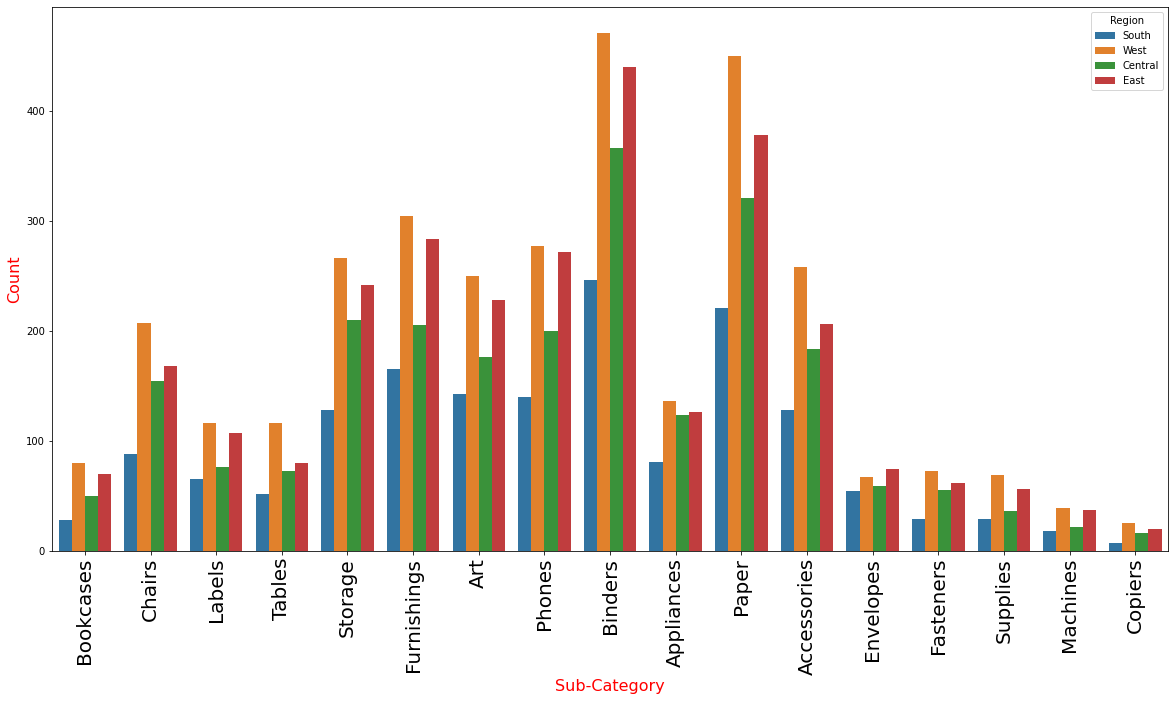

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x='Sub-Category',hue="Region", data=data)
plt.xlabel('Sub-Category', size=16 , color = 'Red')
plt.ylabel('Count', size = 16 ,color = 'Red')
plt.xticks(rotation="vertical", size=20)
plt.show()

In [11]:
sales=pd.DataFrame(data.groupby('Sub-Category').sum()['Sales'])
sales

,Sales
Sub-Category,
Accessories,167380.3180
Appliances,107532.1610
Art,27118.7920
Binders,203412.7330
Bookcases,114879.9963
Chairs,328449.1030
Copiers,149528.0300
Envelopes,16476.4020
Fasteners,3024.2800


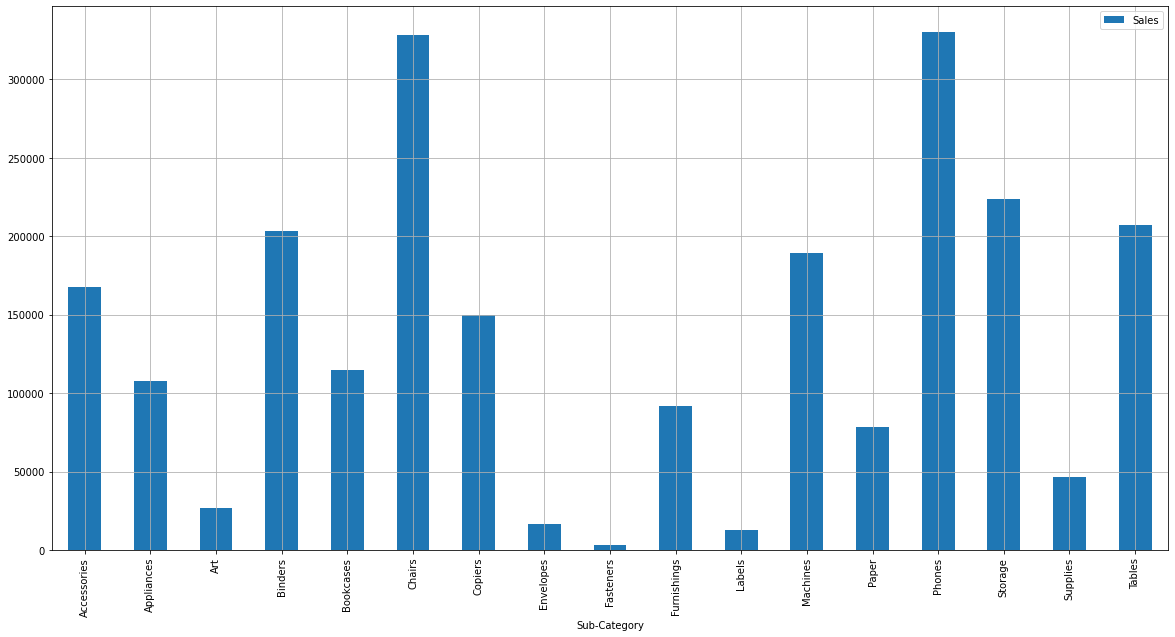

In [12]:
#Visualizing it on the Graphs
sales.plot.bar(figsize=(20,10), grid=True)
plt.show()

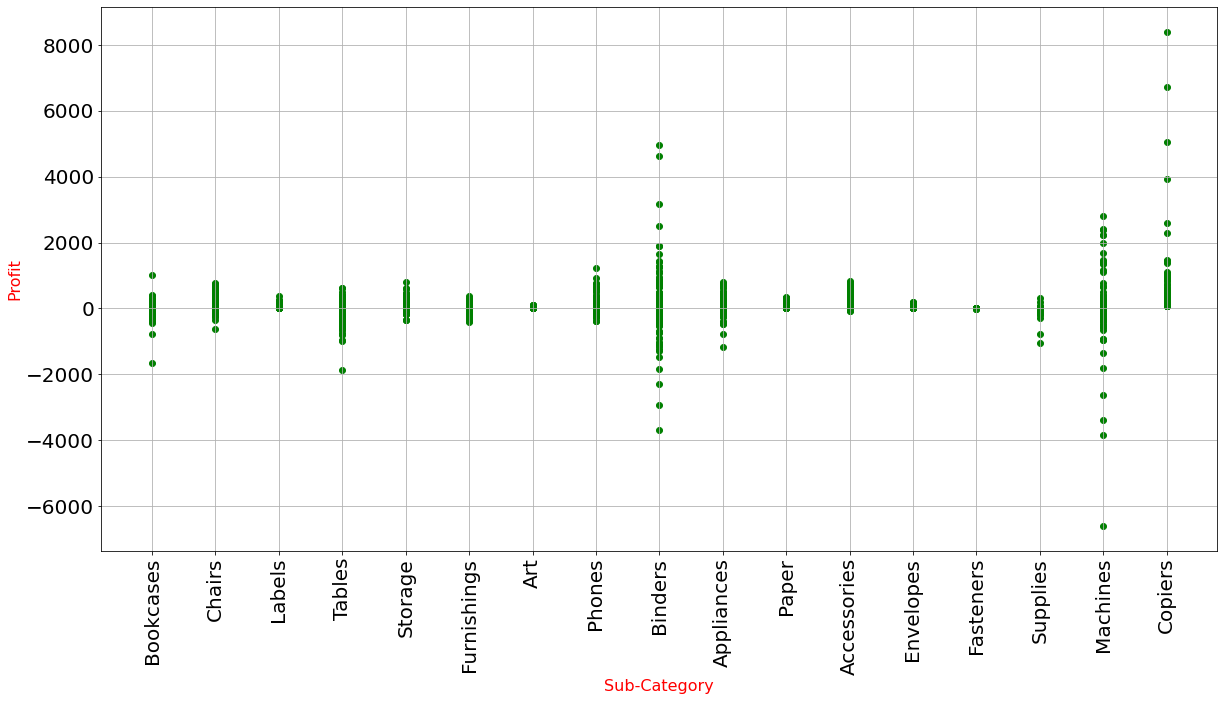

In [13]:
#plot in scatter plot
plt.figure(figsize=(20,10))
plt.grid()
plt.scatter("Sub-Category","Profit", c="g", data=data)
plt.xticks(rotation="vertical", size=20)
plt.xlabel('Sub-Category',size=16 , color = 'Red')
plt.yticks(size=20)
plt.ylabel('Profit',size = 16 ,color = 'Red')
plt.show()

In [14]:
profit=pd.DataFrame(data.groupby('Sub-Category').sum()['Profit'])
profit.sort_values('Profit',ascending=False)

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


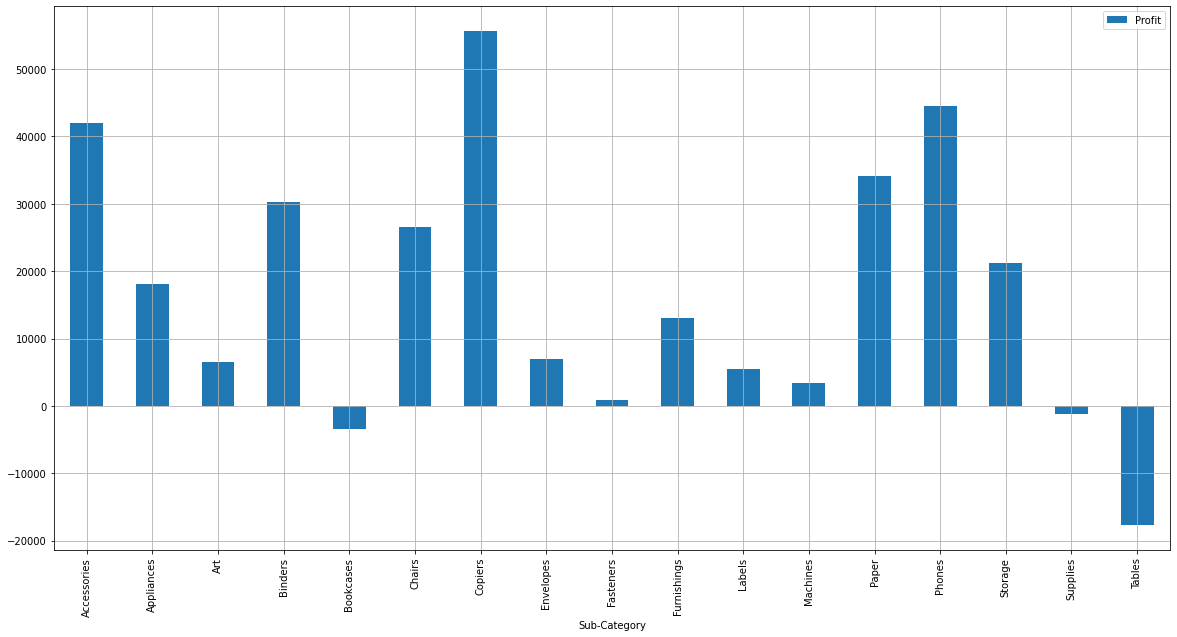

In [15]:
profit.plot.bar(figsize=(20,10),grid=True)
plt.show()

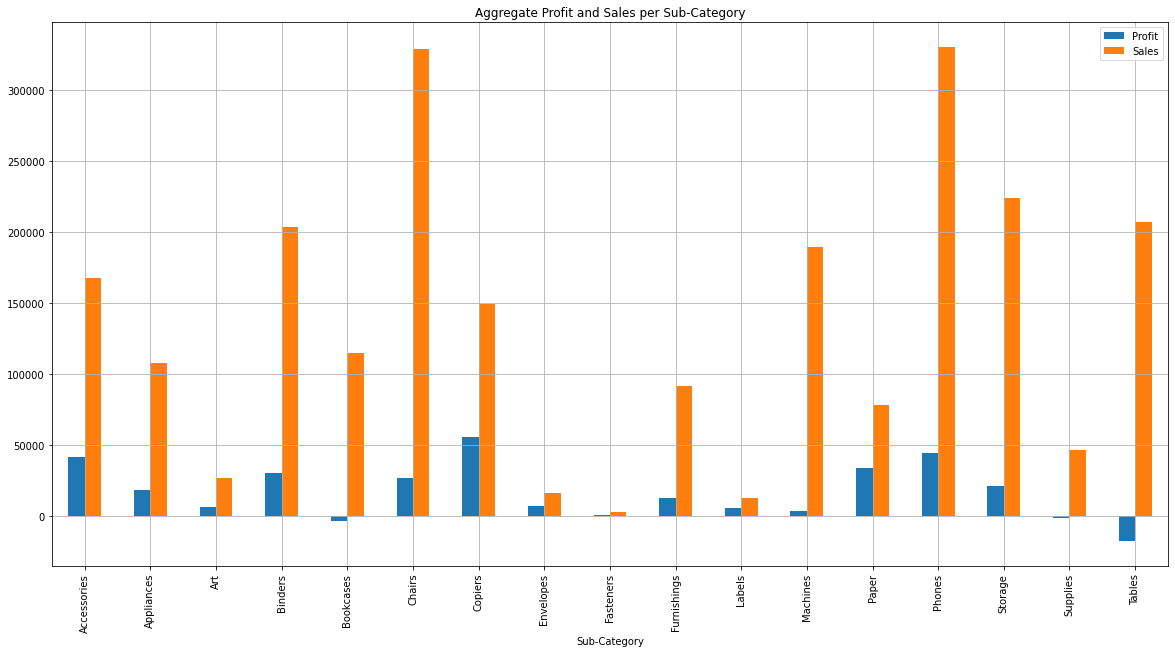

In [16]:
data.groupby('Sub-Category')[['Profit', 'Sales']].sum().plot.bar(figsize=(20,10))
plt.grid()
plt.title("Aggregate Profit and Sales per Sub-Category")
plt.show()

# Region where store is getting more profit

In [17]:
state_profit=pd.DataFrame(data.groupby('State').sum()['Profit'])
state_profit.sort_values('Profit', ascending=False)

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


In [18]:
state_profit=pd.DataFrame(data.groupby('Region').sum()['Profit'])
state_profit.sort_values('Profit', ascending=False)

,Profit
Region,
West,108418.4489
East,91522.7800
South,46749.4303
Central,39706.3625


<AxesSubplot:ylabel='Profit'>

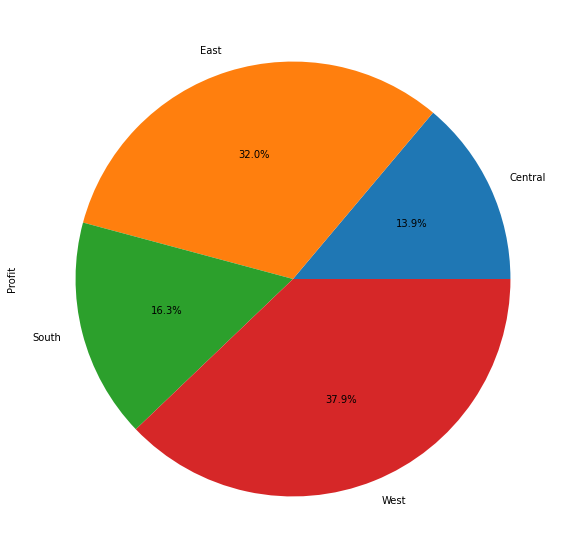

In [19]:
plt.figure(figsize=(20,10))
data.groupby('Region').sum()['Profit'].plot.pie(autopct='%1.1f%%')

### West Region Give More Profit and the Lass profit is Central